# UCI ML Wisconsin Breast Cancer Diagnosis - Deep Learning Model

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Wikipedia page describing breast cancer

https://en.wikipedia.org/wiki/Breast_cancer

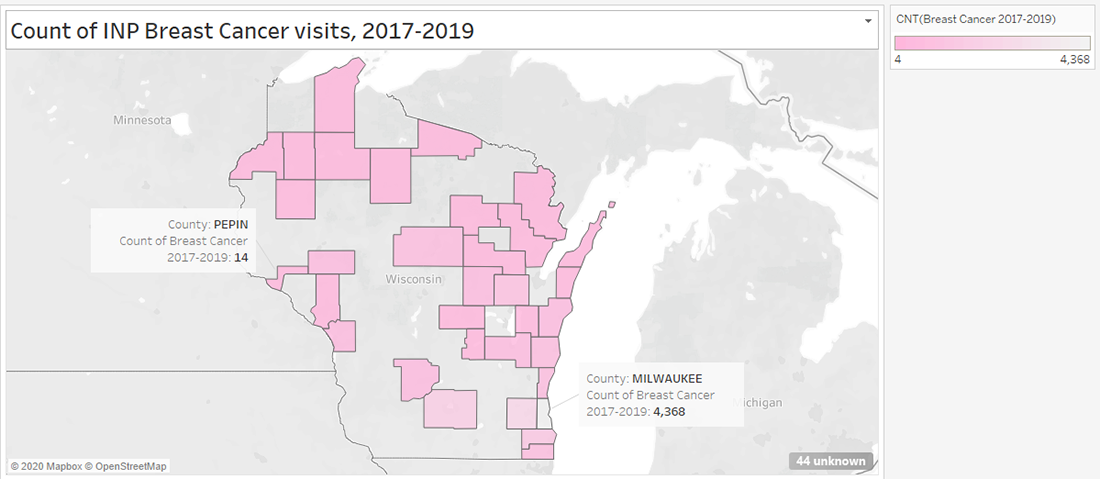

In [62]:
from IPython.display import Image
dirpath = r'C:\Users\joeba\OneDrive\Documents\ML\wbcd'
Image(dirpath + '/BreastCancerMap_20172019.png') 

In [1]:
# load libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense

from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers

from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Using TensorFlow backend.


In [2]:
dirpath = r'C:\Users\joeba\OneDrive\Documents\ML\wbcd'

In [3]:
# load data set - this is a pre-cleaned dataset from the original, redundant and noisy features removed
df = pd.read_csv(dirpath+'/wbcd30.csv')
df = df.drop('ID_number', 1)
df.head()

,Diagnosis,radius_m,texture_m,perimeter_m,area_m,smoothness_m,compactness_m,concavity_m,concave_points_m,symmetry_m,...,radius_w,texture_w,perimeter_w,area_w,smoothness_w,compactness_w,concavity_w,concave_points_w,symmetry_w,fractal_dimension_w
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
list(df.columns)

['Diagnosis',
 'radius_m',
 'texture_m',
 'perimeter_m',
 'area_m',
 'smoothness_m',
 'compactness_m',
 'concavity_m',
 'concave_points_m',
 'symmetry_m',
 'fractal_dimension_m',
 'radius_s',
 'texture_s',
 'perimeter_s',
 'area_s',
 'smoothness_s',
 'compactness_s',
 'concavity_s',
 'concave_points_s',
 'symmetry_s',
 'fractal_dimension_s',
 'radius_w',
 'texture_w',
 'perimeter_w',
 'area_w',
 'smoothness_w',
 'compactness_w',
 'concavity_w',
 'concave_points_w',
 'symmetry_w',
 'fractal_dimension_w']

In [5]:
X = df.iloc[:, 1:31].values
x = df.iloc[:, 1:31].columns
Y = df.iloc[:, 0].values
y = ['B', 'M']

X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
# scale the training data
X = preprocessing.robust_scale(X)

In [7]:
# convert the 'M' and 'B' to 1 and 0 respectively for Y
y2 = LabelEncoder().fit_transform(Y)

In [8]:
# training test set split - 75% being used to train and ensuring even stratification of output in test set
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.25, random_state=1, stratify=None)

print('training set has : {} rows'.format(len(X_train)))
print('test set has     : {} rows'.format(len(y_test)))


training set has : 426 rows
test set has     : 143 rows


In [27]:
# keras neural network
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20,input_shape=(30,), activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='mse')
#model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])



In [29]:
# fit model over 200 epochs
history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)
history_dict = history.history

In [31]:
# what are the results?
print('Accuracy : %.3f' % accuracy_score(y_pred, y_test))
print('Error    : %.3f' % (1 - accuracy_score(y_pred, y_test)))
print('Precision: %.3f' % precision_score(y_pred, y_test))
print('Recall   : %.3f' % recall_score(y_pred, y_test))

Accuracy : 0.972
Error    : 0.028
Precision: 0.945
Recall   : 0.981


In [30]:
# evaluate the performance of the neural network
y_pred = model.predict(X_test)
y_pred = np.rint(y_pred)

cm = confusion_matrix(y_test, y_pred)
cm

#            predicted
#            N   P
#           +-----
# actual  N |TN  FP
#         P |FN  TP

array([[87,  1],
       [ 3, 52]], dtype=int64)

In [59]:
print(np.flip(cm))

[[50  5]
 [ 0 88]]


In [53]:
### keras neural network ###
# in this case 20 (hidden), 30 input and then 1 output nodes in 3 layers
# keras neural network
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20,input_shape=(30,), activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#model.compile(optimizer='sgd', loss='mse')
#model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])


In [55]:
# fit model over 200 epochs
history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)
history_dict = history.history

In [57]:
# what are the results?
print('Accuracy : %.3f' % accuracy_score(y_pred, y_test))
print('Error    : %.3f' % (1 - accuracy_score(y_pred, y_test)))
print('Precision: %.3f' % precision_score(y_pred, y_test))
print('Recall   : %.3f' % recall_score(y_pred, y_test))

Accuracy : 0.965
Error    : 0.035
Precision: 0.909
Recall   : 1.000


In [56]:
# evaluate the performance of the neural network
y_pred = model.predict(X_test)
y_pred = np.rint(y_pred)

cm = confusion_matrix(y_test, y_pred)
cm

#            predicted
#            N   P
#           +-----
# actual  N |TN  FP
#         P |FN  TP

array([[88,  0],
       [ 5, 50]], dtype=int64)

In [ ]:
# build a comparison of y_pred and y_test - which ones were wrong?
wrong = []